# World Happiness Data Analysis

## Setup and Data Import
In this section, I upload the dataset, unzip it, and import the necessary libraries and helper modules.Upload the zip file

In [34]:
from google.colab import files

uploaded = files.upload()  # select world-happiness.zip

Saving world_happiness.zip to world_happiness.zip


To check current working directory

In [35]:
!pwd

/content


In [37]:
!unzip -o world_happiness.zip

Archive:  world_happiness.zip
  inflating: .DS_Store               
 extracting: pyproject.toml          
 extracting: README.md               
 extracting: TUTORIAL.md             
 extracting: .gitignore              
 extracting: LICENSE.txt             
  inflating: data/2019.csv           
  inflating: data/2018.csv           
  inflating: data/2015.csv           
  inflating: data/2016.csv           
  inflating: data/2017.csv           
   creating: .idea/
   creating: .idea/inspectionProfiles/
  inflating: .idea/inspectionProfiles/profiles_settings.xml  
  inflating: .idea/world_happiness.iml  
 extracting: .idea/.gitignore        
  inflating: .idea/workspace.xml     
  inflating: .idea/modules.xml       
  inflating: .idea/misc.xml          
   creating: src/
  inflating: src/.DS_Store           
   creating: src/happiness/
  inflating: src/happiness/__init__.py  
  inflating: src/happiness/happiness_visualizer.py  
  inflating: src/happiness/happiness_handler.py  


In [38]:
# Add package to Python path

import sys
sys.path.append('/content/world_happiness/src') # add src to Python path

# Importing HappinessHandler and HappinessVisualizer from the happiness Module


In [39]:
# Import using __init__.py
from happiness import HappinessHandler, HappinessVisualizer

# Data Cleaning


I start by exploring the column differences between the 2015 and 2019 datasets. This helps me understand what needs to be standardized before merging all years.


In [40]:
import pandas as pd

In [70]:
# Initialize handler with path to data folder
hh = HappinessHandler(data_dir="/content/data")

# Load 2015–2019 datasets using the package
df_list = []
for year in range(2015, 2020):
    df_year = hh.load_data(year) ##
    df_year['Year'] = year
    df_list.append(df_year)

# To show difference between naming in year 2015 and 2019

In [45]:
# Show first 5 rows to compare columns for year 2015

df_list[0].head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [46]:
# Delete columns 'Happiness Rank', 'Region','Standard Error','Dystopia Residual'
# as are not important for our data analysis

df_list[0] = df_list[0].drop(columns=[col for col in
                            ['Region','Happiness Rank','Standard Error','Dystopia Residual']
                             if col in df_list[0].columns])

df_list[0].head(5)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [47]:
df_list[1].head(5) # 2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [48]:
df_list[1] = df_list[1].drop(columns=[col for col in
                            ['Region','Happiness Rank','Lower Confidence Interval',
                             'Upper Confidence Interval', 'Dystopia Residual']
                             if col in df_list[1].columns])

df_list[1].head(5)

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [49]:
df_list[2].head(5)  # 2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [50]:
df_list[2] = df_list[2].drop(columns=[col for col in
                            ['Happiness.Rank','Whisker.high',
                             'Whisker.low', 'Dystopia.Residual']
                             if col in df_list[2].columns])

df_list[2].head(5)

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [51]:
df_list[3].head(5)  # 2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [52]:
df_list[3] = df_list[3].drop(columns='Overall rank')

df_list[3].head(5)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [53]:
df_list[4].head(5)  # 2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [54]:
# Show first 3 rows to compare columns of year 2019
df_list[4].head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


# Standardizing Column Names Across Years and Combining Data

In [55]:
for year in range(2015, 2020):
    df_year = hh.load_data(year)

    # Keep only relevant columns and rename for consistency
    rename_15 = {
            'Country': 'Country',
            'Happiness Score': 'Score',
            'Economy (GDP per Capita)': 'GDP per capita',
            'Family': 'Social support',
            'Health (Life Expectancy)': 'Healthy life expectancy',
            'Freedom': 'Freedom to make life choices',
            'Trust (Government Corruption)': 'Perceptions of corruption',
            'Generosity': 'Generosity'
    }


    rename_16 = {
            'Country': 'Country',
            'Happiness Score': 'Score',
            'Economy (GDP per Capita)': 'GDP per capita',
            'Family': 'Social support',
            'Health (Life Expectancy)': 'Healthy life expectancy',
            'Freedom': 'Freedom to make life choices',
            'Trust (Government Corruption)': 'Perceptions of corruption',
            'Generosity': 'Generosity',
    }

    rename_17 = {
            'Country': 'Country',
            'Happiness.Score': 'Score',
            'Economy..GDP.per.Capita.': 'GDP per capita',
            'Family': 'Social support',
            'Health..Life.Expectancy.': 'Healthy life expectancy',
            'Freedom': 'Freedom to make life choices',
            'Trust..Government.Corruption.': 'Perceptions of corruption',
            'Generosity': 'Generosity'
    }

    rename_18 = {
            'Country or region': 'Country',
            'Score': 'Score',
            'GDP per capita': 'GDP per capita',
            'Social support': 'Social support',
            'Healthy life expectancy': 'Healthy life expectancy',
            'Freedom to make life choices': 'Freedom to make life choices',
            'Generosity': 'Generosity',
            'Perceptions of corruption': 'Perceptions of corruption'
    }

    rename_19 = {
            'Country or region': 'Country',
            'Score': 'Score',
            'GDP per capita': 'GDP per capita',
            'Social support': 'Social support',
            'Healthy life expectancy': 'Healthy life expectancy',
            'Freedom to make life choices': 'Freedom to make life choices',
            'Generosity': 'Generosity',
            'Perceptions of corruption': 'Perceptions of corruption'
    }

In [56]:
cols_to_keep = ['Country', 'Score', 'GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Perceptions of corruption', 'Generosity', 'Year'] # Include 'Year' in the columns to keep

df_cleaned_list = []

for year, df in zip(range(2015, 2020), df_list):

    # Rename columns
    if year == 2015:
        df.rename(columns=rename_15, inplace=True)
    elif year == 2016:
        df.rename(columns=rename_16, inplace=True)
    elif year == 2017:
        df.rename(columns=rename_17, inplace=True)
    elif year == 2018:
        df.rename(columns=rename_18, inplace=True)
    else:
        df.rename(columns=rename_19, inplace=True)

    # Keep relevant columns only
    df = df[[col for col in cols_to_keep if col in df.columns]].copy()

    # Year column already added in previous step
    df_cleaned_list.append(df)

# Merge all years
df_all = pd.concat(df_cleaned_list, ignore_index=True)

# Handling Missing Values and Computing Weighted Score

In [57]:
# Check missing values
missing_counts = df_all.isnull().sum()
print(missing_counts)

# Fill numeric columns with mean
numeric_cols = ['Score', 'GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Perceptions of corruption', 'Generosity']

df_all[numeric_cols] = df_all[numeric_cols].fillna(df_all[numeric_cols].mean())

# Fill missing Country names
df_all['Country'] = df_all['Country'].fillna('Unknown')

# Reset index
df_all.reset_index(drop=True, inplace=True)

# Compute weighted score
hh.data = df_all               # Assign merged data to handler
hh.compute_weighted_score()    # Adds 'Weighted_Score' column to hh.data

# If you want, you can also update df_all with this column
df_all = hh.data.copy()

# Preview the new column
df_all[['Country', 'Year', 'Weighted_Score']].head(10)

# Preview
df_all.head(5)

Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       1
Generosity                      0
Year                            0
dtype: int64


,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year,Weighted_Score
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1.080280
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1.054024
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1.051372
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1.083540
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1.043995


In [58]:
# Make sure hh.data has the cleaned & merged df_all
hh.data = df_all

In [59]:
# Get top 10 countries by average Score

top_countries = hh.get_top_countries(n=10) ## happiness_handler.py
print(top_countries)

                     Country  Weighted_Score
85                Luxembourg        1.124549
111                   Norway        1.117604
130                Singapore        1.109784
145              Switzerland        1.107602
66                   Ireland        1.095409
61                   Iceland        1.093378
122                    Qatar        1.092250
38                   Denmark        1.085297
6                  Australia        1.080912
59   Hong Kong S.A.R., China        1.076878


In [60]:
hv = HappinessVisualizer(df_all)

# Calling plot_top_countries function from happiness_visualizer class

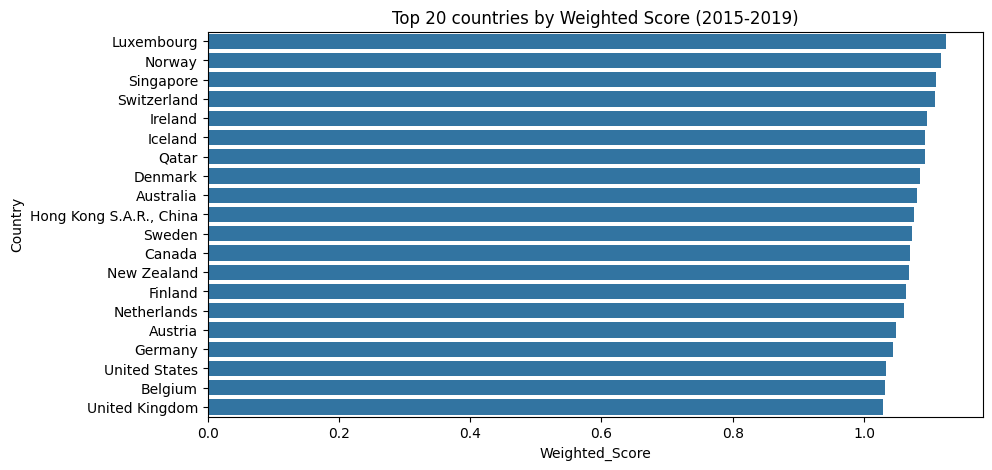

In [61]:
# Bar plot for top 20 countries based on average score across 5 years

hv.plot_top_countries(n=20) ## happiness_visualizer

# To see the correlation between different attributes

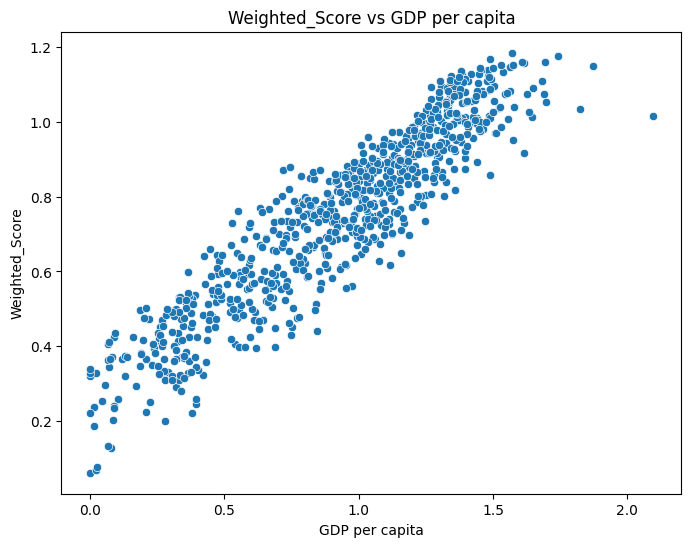

In [62]:
# # Scatter plot to show correlation between GDP per capita and Weighted_Score for all years

hv.plot_correlation(x='GDP per capita', y='Weighted_Score')

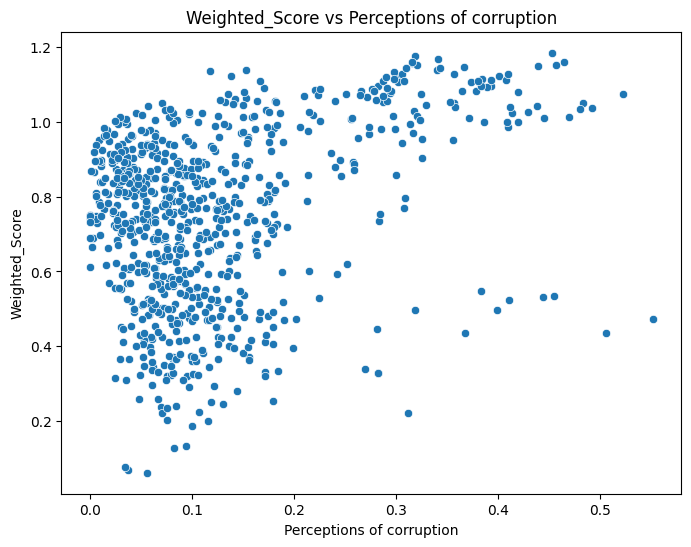

In [63]:
hv.plot_correlation(x='Perceptions of corruption', y='Weighted_Score')

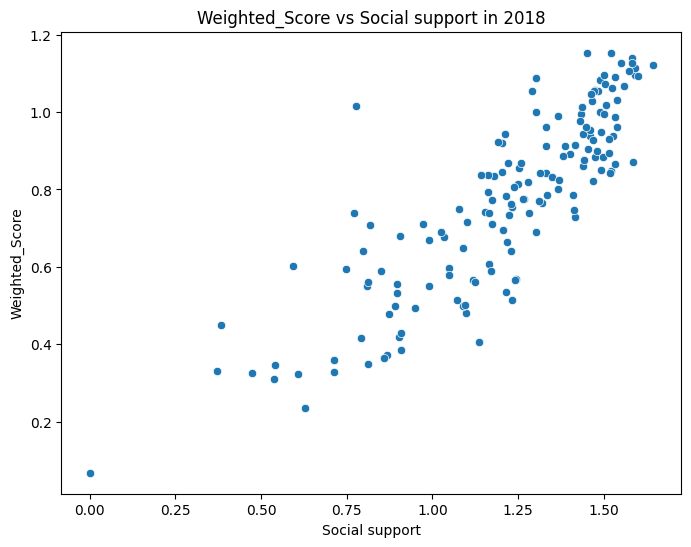

In [64]:
# To compare Social support vs Weighted_Score for 2018 only

hv.plot_correlation(x='Social support', y='Weighted_Score', year = 2018)

# Similarly can see correlation between different attributes

# Weighted Score trend over years for various countries

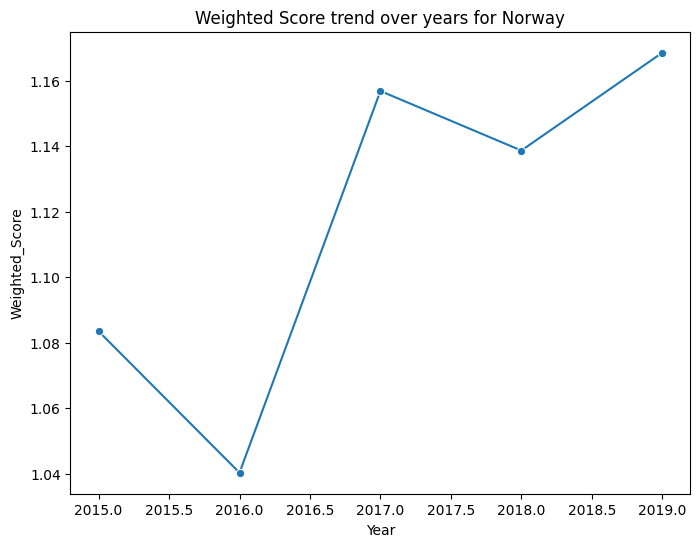

In [65]:
# Line plot for Norway over 2015–2019

hv.plot_trend("Norway")

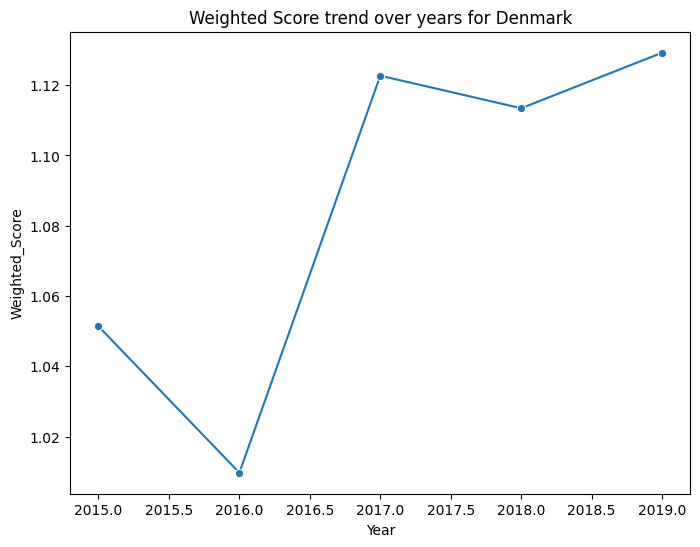

In [66]:
# Line plot for Denmark over 2015–2019

hv.plot_trend("Denmark")

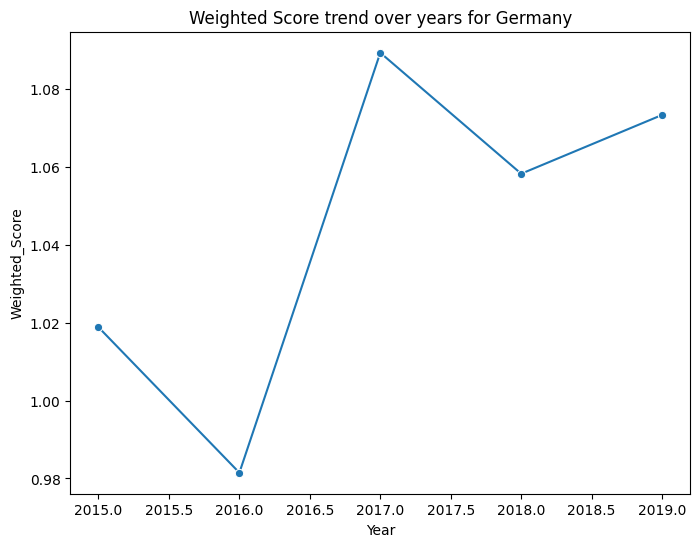

In [67]:
# Line plot for Germany over 2015–2019

hv.plot_trend(country='Germany')

# Checking Country Rank Across Years

In [68]:
# To check Germany's rank across 5 years

# Here to ask the user to input a country name
country_name = input("Enter the country name to check its rank: ").strip()

try:
    rank, total_countries, avg_score = hh.get_country_rank(country_name)
    print(f"{country_name} ranks {rank} out of {total_countries} countries with an average score of {avg_score:.2f}")
except ValueError as e:
    print(e)

Enter the country name to check its rank: Germany
Germany ranks 17 out of 170 countries with an average score of 1.04


In [69]:
# To check Spain's rank across 5 years

# Here to ask the user to input a country name
country_name = input("Enter the country name to check its rank: ").strip()

try:
    rank, total_countries, avg_score = hh.get_country_rank(country_name)
    print(f"{country_name} ranks {rank} out of {total_countries} countries with an average score of {avg_score:.2f}")
except ValueError as e:
    print(e)

Enter the country name to check its rank: Spain
Spain ranks 27 out of 170 countries with an average score of 1.00
